<a href="https://colab.research.google.com/github/rliquitay/compras/blob/main/NLP_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda entrega

En esta segunda entrega vamos a hacer un análisis de reviews en Yelp.

Dado el siguiente dataset https://drive.google.com/file/d/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE/view?usp=sharing:

Deberán hacer un análisis de las reviews.

El análisis no tiene limites y pueden agregar todas las ideas que les surjan, pero como mínimo debe incluir: keywords y tópicos por negocio (business id), sentimiento de cada review, entidades por review, negocio con más comentarios positivos y negocio con más comentarios negativos.

Además, pueden agregar por ejemplo (Opcional): Tópicos asociados sentimientos, keywords asociadas a sentimientos, sentimientos a lo largo del tiempo (utilizando la columna date)...

### Entrega

**Fecha limite**: 18/09/2022. 

Deben compartir el notebook con todo el análisis realizado en la tarjeta de spritn 2 (recuerden que si entregan un colab, compartirlo con el mail del profe para que tenga acceso).


### Presentación

**Fecha**: Lunes 19/09/2022 y Jueves 22/09/2022.

La presentación NO debe ser una presentación del notebook. La presentación debe constar de filminas que muestren los **resultados** que obtuvieron, mencionar herramientas que utilizaron, que decisiones tomaron y conclusiones. No deben mostrar nada de código en la presentación.

Una vez que ya hayan presentado (por ejemplo un powerpoint), podemos resolver las dudas que surjan sobre código, etc.



###Importar librerías necesarias

In [1]:
!pip install matplotlib=="3.5.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 2.9 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
     |████████████████████████████████| 4.9 MB 28.8 MB/s 
     |████████████████████████████████| 1.3 MB 41.3 MB/s 
     |████████████████████████████████| 120 kB 52.3 MB/s 
     |████████████████████████████████| 6.6 MB 32.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=a322d1bd82306377859e47dc87dde85cc6e6d8213f11b74c1b3d6da94fe6342c
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [4]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 2.2 MB/s 
     |████████████████████████████████| 5.2 MB 10.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 45.6 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 1.1 MB 55.7 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340248 sha256=74a844feb8221ed74e322d255c7bc40f6492f96011a225446917873f75670e49
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1797b716c2fbf7f944c0a4c7c57ae475cd497d705f306f072774447ac4df6b67
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1f

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
import numpy as np
#import re, string
#import sys
import time
import collections
from keybert import KeyBERT
from bertopic import BERTopic

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

###Leer archivo con reviews

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

--2022-09-18 22:04:12--  https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE
Resolving docs.google.com (docs.google.com)... 108.177.125.101, 108.177.125.100, 108.177.125.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vq8t4ua6g4gk9d6gvfpke639g616rfjs/1663538625000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download&uuid=262fe75f-6758-460c-b41e-b4412f5b444d [following]
--2022-09-18 22:04:16--  https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vq8t4ua6g4gk9d6gvfpke639g616rfjs/1663538625000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download&uuid=262fe75f-6758-460c-b41e-b4412f5b444d
Resolving doc-10-74-docs.googleusercontent.com (doc-10-74-docs.googleusercontent.com)... 108.177.97.132, 2404:6

In [7]:
df = pd.read_csv("/content/reviews.csv")
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


###Análisis Exploratorio 🔍

In [8]:
print(f"El archivo cuenta con {df.shape[0]} registros o filas y {df.shape[1]} features o columnas.")

El archivo cuenta con 27290 registros o filas y 10 features o columnas.


In [9]:
print(f"Las columnas o features son {df.columns}.")

Las columnas o features son Index(['user_id', 'review_id', 'text', 'votes.cool', 'business_id',
       'votes.funny', 'stars', 'date', 'type', 'votes.useful'],
      dtype='object').


In [10]:
print(f"Hay {df['business_id'].nunique()} comercios evaluados.")

Hay 1320 comercios evaluados.


In [11]:
print(f"Hay {df['user_id'].nunique()} usuarios que emitieron su opinión.")

Hay 14861 usuarios que emitieron su opinión.


In [12]:
print(f"Los 10 principales comercios sobre los que la gente opinó recibieron más de 200 reviews y fueron: \n {df.business_id.value_counts().head(10)}")

Los 10 principales comercios sobre los que la gente opinó recibieron más de 200 reviews y fueron: 
 3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
vgXE1I7c9ElcfYyZfQiN1Q     243
2X5G4Ujq0s4Wfn4TC7gX0g     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
Name: business_id, dtype: int64


In [13]:
print(f"En términos porcentuales las reviews de estos comercios no representan más del 4 % cada uno: \n {df.business_id.value_counts('%').head(10)}")

En términos porcentuales las reviews de estos comercios no representan más del 4 % cada uno: 
 3Q0QQPnHcJuX1DLCL9G9Cg    0.039135
mpDxBBGywUE6GRRKja3sBA    0.019311
NeUf9FyCCIN4MEseNyqkXQ    0.014181
jTGQUWGIVvL-aY03C5BEmw    0.010700
NTfUFk8GyOLL1uPbEO-pVg    0.009161
XmdTkxKyJd7TuDLoiic1kg    0.009124
vgXE1I7c9ElcfYyZfQiN1Q    0.008904
2X5G4Ujq0s4Wfn4TC7gX0g    0.008904
2SwC8wqpZC4B9iFVTgYT9A    0.008758
rgmptwPbBH1wLpiBHcbIhA    0.008098
Name: business_id, dtype: float64


In [14]:
print(f"Los 10 principales usuarios que escribieron reviews fueron: \n {df.user_id.value_counts().head(10)}")

Los 10 principales usuarios que escribieron reviews fueron: 
 iTmWHtltCtk0Gm55AOxrUA    113
nEYPahVwXGD2Pjvgkm7QqQ     84
-_1ctLaz3jhPYc12hKXsEQ     82
q7MrNVt1FE23rwtWmPYWHg     69
UD7Y1CqfY6mDmRwIuCf6nA     68
VhI6xyylcAxi0wOy2HOX3w     66
bvu13GyOUwhEjPum2xjiqQ     61
hru2IDwSyN61sgWPtJw_hA     60
So32N7bSbUd1RwhFtI6jTQ     58
ts7EG6Zv2zdMDg29nyqGfA     57
Name: user_id, dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


###Algunas visualizaciones previas

####Distribución variable Stars

Hay más reviews con 4 y 5 estrellas.

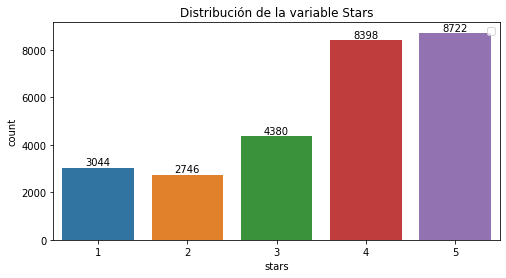

In [16]:
fig = plt.figure(figsize=(8,4))
columna = sns.countplot(x="stars", data = df)
columna.bar_label(columna.containers[0])
plt.title("Distribución de la variable Stars")
plt.legend(loc="upper right")
plt.show()

####Tipo de estrella para los 10 principales comercios con reviews

Las reviews de 4 estrellas son las que más se destacan entre los comercios más votados. Tiene una tendencia decreciente.
Las revies de 5 estrellas suben y bajan. 

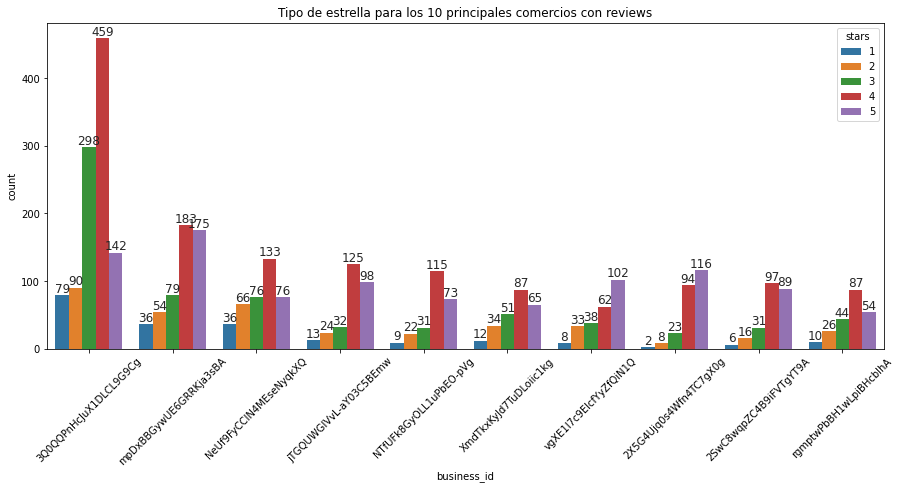

In [17]:
fig, ax = plt.subplots(figsize = (15, 6))
columna = sns.countplot(x='business_id', data=df, order=df.business_id.value_counts()[:10].index, hue = 'stars') #los diez principales comercios
plt.xticks(rotation=45)
sns.set(style="darkgrid")
for container in columna.containers:
  columna.bar_label(container)
plt.title("Tipo de estrella para los 10 principales comercios con reviews")
plt.show()

####Tipo de stars según los 10 principales usuarios

Los principales usuarios dejaron entre 3 y 4 estrellas en las reviews

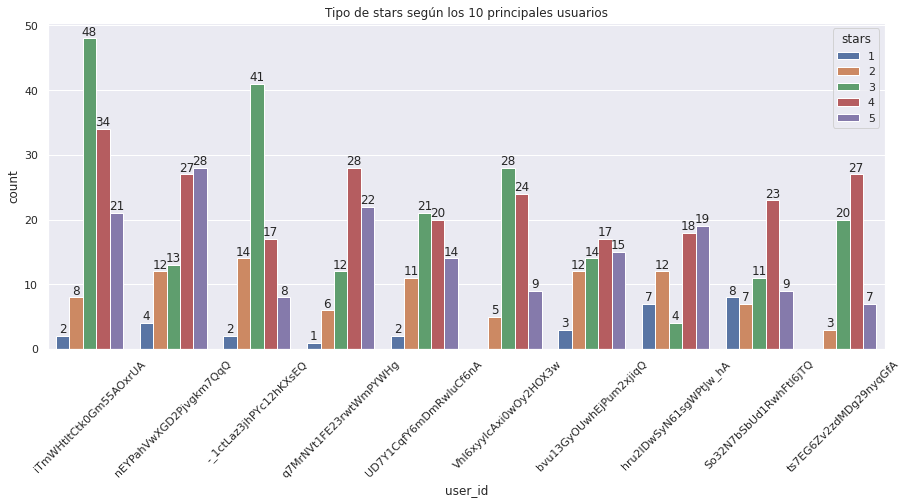

In [18]:
fig, ax = plt.subplots(figsize = (15, 6))
columna = sns.countplot(x='user_id', data=df, order=df.user_id.value_counts()[:10].index, hue = 'stars') #los diez principales clientes
plt.xticks(rotation=45)
sns.set(style="darkgrid")
columna.bar_label(columna.containers[0])
columna.bar_label(columna.containers[1])
columna.bar_label(columna.containers[2])
columna.bar_label(columna.containers[3])
columna.bar_label(columna.containers[4])
plt.title("Tipo de stars según los 10 principales usuarios")
plt.show()

####Evolución de la cantidad de estrellas a lo largo del tiempo

In [19]:
df['date'] = pd.to_datetime(df['date']) #conversión de la columna fecha a tipo datetime

In [20]:
print(f"Las reviews comprenden desde {df.date.min()} a {df.date.max()}")


Las reviews comprenden desde 2005-09-06 00:00:00 a 2015-12-24 00:00:00


In [21]:
df ['anio'] = df ['date'].dt.year 
df ['mes'] = df ['date'].dt.month

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        27290 non-null  object        
 1   review_id      27290 non-null  object        
 2   text           27290 non-null  object        
 3   votes.cool     27290 non-null  int64         
 4   business_id    27290 non-null  object        
 5   votes.funny    27290 non-null  int64         
 6   stars          27290 non-null  int64         
 7   date           27290 non-null  datetime64[ns]
 8   type           27290 non-null  object        
 9   votes.useful   27290 non-null  int64         
 10  anio           27290 non-null  int64         
 11  mes            27290 non-null  int64         
 12  anio-mes       27290 non-null  object        
 13  review length  27290 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 2.9+ MB


In [23]:
df["anio-mes"] = df["anio"].map(str) + " " + df["mes"].map(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       27290 non-null  object        
 1   review_id     27290 non-null  object        
 2   text          27290 non-null  object        
 3   votes.cool    27290 non-null  int64         
 4   business_id   27290 non-null  object        
 5   votes.funny   27290 non-null  int64         
 6   stars         27290 non-null  int64         
 7   date          27290 non-null  datetime64[ns]
 8   type          27290 non-null  object        
 9   votes.useful  27290 non-null  int64         
 10  anio          27290 non-null  int64         
 11  mes           27290 non-null  int64         
 12  anio-mes      27290 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 2.7+ MB


In [25]:
groupby_stars = df.groupby(by=['anio','stars']).count()
groupby_stars

user_id  review_id  text  votes.cool  business_id  votes.funny  \
anio stars                                                                   
2005 4            2          2     2           2            2            2   
     5            1          1     1           1            1            1   
2006 2            6          6     6           6            6            6   
     3           12         12    12          12           12           12   
     4           25         25    25          25           25           25   
     5           25         25    25          25           25           25   
2007 1           11         11    11          11           11           11   
     2           21         21    21          21           21           21   
     3           48         48    48          48           48           48   
     4          101        101   101         101          101          101   
     5          118        118   118         118          118          118   
2008 1           33         33    33          33           33           33   
     2           84         84    84          84           84           84   
     3          254        254   254         254          254          254   
     4          360        360   360         360          360          360   
     5          233        233   233         233          233          233   
2009 1           79         79    79          79           79           79   
     2          110        110   110         110          110          110   
     3          221        221   221         221          221          221   
     4          391        391   391         391          391          391   
     5          322        322   322         322          322          322   
2010 1          136        136   136         136          136          136   
     2          212        212   212         212          212          212   
     3          385        385   385         385          385          385   
     4          722        722   722         722          722          722   
     5          531        531   531         531          531          531   
2011 1          231        231   231         231          231          231   
     2          351        351   351         351          351          351   
     3          639        639   639         639          639          639   
     4         1170       1170  1170        1170         1170         1170   
     5          885        885   885         885          885          885   
2012 1          342        342   342         342          342          342   
     2          370        370   370         370          370          370   
     3          644        644   644         644          644          644   
     4         1300       1300  1300        1300         1300         1300   
     5         1028       1028  1028        1028         1028         1028   
2013 1          444        444   444         444          444          444   
     2          425        425   425         425          425          425   
     3          624        624   624         624          624          624   
     4         1277       1277  1277        1277         1277         1277   
     5         1276       1276  1276        1276         1276         1276   
2014 1          694        694   694         694          694          694   
     2          530        530   530         530          530          530   
     3          768        768   768         768          768          768   
     4         1477       1477  1477        1477         1477         1477   
     5         1835       1835  1835        1835         1835         1835   
2015 1         1074       1074  1074        1074         1074         1074   
     2          637        637   637         637          637          637   
     3          785        785   785         785          785          785   
     4         1573       1573  15

In [26]:
groupby_stars.reset_index(inplace=True)
groupby_stars

,anio,stars,user_id,review_id,text,votes.cool,business_id,votes.funny,date,type,votes.useful,mes,anio-mes
0,2005,4,2,2,2,2,2,2,2,2,2,2,2
1,2005,5,1,1,1,1,1,1,1,1,1,1,1
2,2006,2,6,6,6,6,6,6,6,6,6,6,6
3,2006,3,12,12,12,12,12,12,12,12,12,12,12
4,2006,4,25,25,25,25,25,25,25,25,25,25,25
5,2006,5,25,25,25,25,25,25,25,25,25,25,25
6,2007,1,11,11,11,11,11,11,11,11,11,11,11
7,2007,2,21,21,21,21,21,21,21,21,21,21,21
8,2007,3,48,48,48,48,48,48,48,48,48,48,48
9,2007,4,101,101,101,101,101,101,101,101,101,101,101


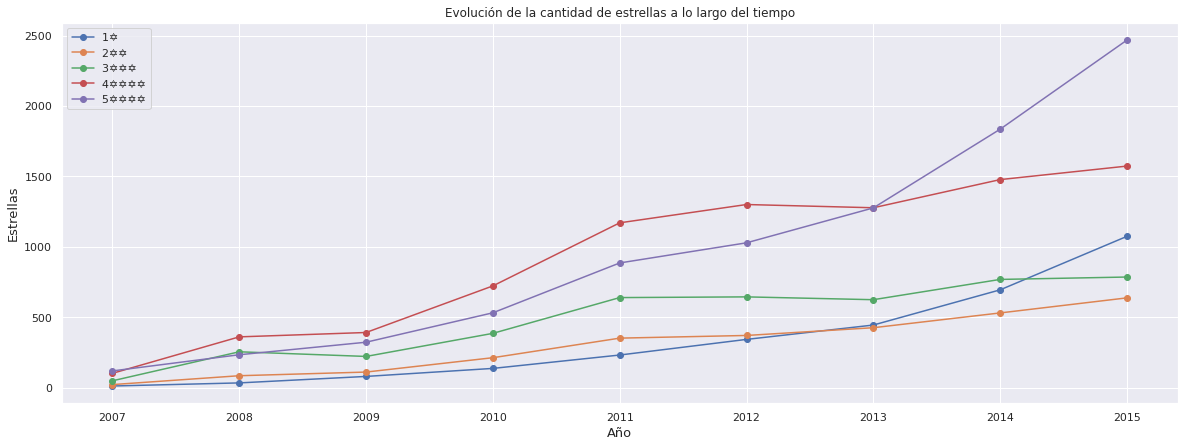

In [27]:
x=groupby_stars[groupby_stars.anio >= 2007].anio.unique()
y1=groupby_stars[(groupby_stars.anio >= 2007) & (groupby_stars.stars == 1)].user_id
y2=groupby_stars[(groupby_stars.anio >= 2007) & (groupby_stars.stars == 2)].user_id
y3=groupby_stars[(groupby_stars.anio >= 2007) & (groupby_stars.stars == 3)].user_id
y4=groupby_stars[(groupby_stars.anio >= 2007) & (groupby_stars.stars == 4)].user_id
y5=groupby_stars[(groupby_stars.anio >= 2007) & (groupby_stars.stars == 5)].user_id

plt.plot(x,y1,marker="o",label = "1✡️")
plt.plot(x,y2,marker="o",label = "2✡️✡️")
plt.plot(x,y3,marker="o",label = "3✡️✡️✡️")
plt.plot(x,y4,marker="o",label = "4✡️✡️✡️✡️")
plt.plot(x,y5,marker="o",label = "5✡️✡️✡️✡️")

plt.legend(loc = "upper left")
plt.title("Evolución de la cantidad de estrellas a lo largo del tiempo")
plt.gcf().set_size_inches(20, 7)
plt.xlabel("Año",fontsize=13)
plt.ylabel("Estrellas",fontsize=13)

plt.show()

###Cantidad de carácteres en el texto según la estrella

It seems like generally, the review length is the same except people that leave 4 and 5 stars tend to leave shorter reviews.

In [28]:
df['review length'] = df['text'].apply(len) #This will count the length of the review by checking how many characters there are in the review.

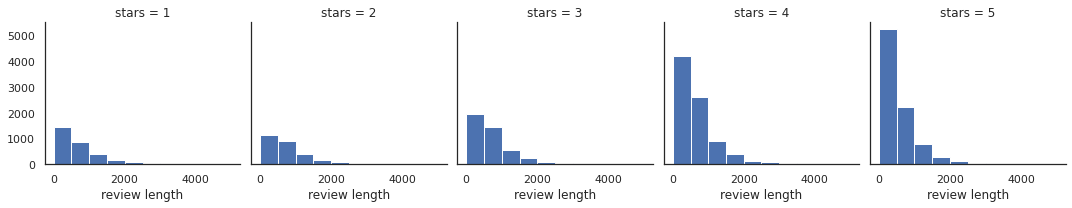

In [29]:
sns.set_style('white') #We will now create five histograms based on the star rating and review length
%matplotlib inline
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'review length')

###Filtramos el dataset

In [30]:
reviews = df.copy()

In [31]:
reviews.shape #dataframe original

(27290, 14)

In [32]:
filtro = reviews.groupby('business_id').filter(lambda x: x.user_id.nunique() > 19).business_id #solo tomaremos los negocios con más de 20 review

In [33]:
filtro = filtro.tolist() #convierto filtro a lista

In [34]:
reviews = reviews[(reviews.business_id.isin(filtro))] #aplico filtro

In [35]:
reviews.info() #dataframe filtrado por los negocios con más de 20 reviews

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19819 entries, 104 to 27223
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        19819 non-null  object        
 1   review_id      19819 non-null  object        
 2   text           19819 non-null  object        
 3   votes.cool     19819 non-null  int64         
 4   business_id    19819 non-null  object        
 5   votes.funny    19819 non-null  int64         
 6   stars          19819 non-null  int64         
 7   date           19819 non-null  datetime64[ns]
 8   type           19819 non-null  object        
 9   votes.useful   19819 non-null  int64         
 10  anio           19819 non-null  int64         
 11  mes            19819 non-null  int64         
 12  anio-mes       19819 non-null  object        
 13  review length  19819 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 2.3+ MB


In [36]:
#reviews.groupby('user_id').filter(lambda x: x.business_id.nunique() > 1).shape #solo usuarios que dejaron más de 1 review a los negocios

In [37]:
#reviews.groupby('business_id').filter(lambda x: len(x) > 1).shape

###Preprocesamiento - EDA

###StopWords - Lemming - Remove Punctuations, Numbers

In [38]:
#reviews.drop(columns=['review_id', 'type', 'votes.cool', 'votes.funny', 'votes.useful', 'user_id', 'business_id'], axis = 1, inplace = True) #elimnamos las columnas que no serán necesarias


In [39]:
reviews.drop(columns=['review_id', 'type', 'votes.cool', 'votes.funny', 'votes.useful', 'user_id'], axis = 1, inplace = True) #elimnamos las columnas que no serán necesarias


In [40]:
reviews.text.head(20) #before cleaning

104    If you want a true understanding of Pittsburgh...
105    Good Luck getting a seat, that's all I have to...
106    Stick to basics and this is the best place in ...
107    The biggest breakfast in Pittsburgh, as far as...
108    Cheap, unpretentious, and, for this, one of my...
109    Okay, let's first set expectations.  This plac...
110    I miss this place. When I return home to pitts...
111    I've lived in Pittsburgh for 6 years, and in C...
112    Love this place.  Never had a bad meal.  Good ...
113    My favorite breakfast place.  Have good sandwi...
114    Definitely a greasy spoon! Always packed here ...
115    If you're looking for no frills but a great br...
116    Great homemade hot breakfast sausage and a won...
117    Great breakfast place. Come hungry. Look for D...
118    OK, what is with all of these "CASH ONLY" plac...
119    BEST DINER IN THE COUNRTY!!! We've been to man...
120    Best French toast ever!! Love the friendly atm...
121    Great Diner!  Their brea

In [41]:
#Alternativa 2

def clean_text(text):
  docs = nlp(text)
  clean_text = [token.lemma_.lower() for token in docs if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space]
  return " ".join(clean_text)

In [42]:
%%time
reviews['text'] = reviews['text'].apply(clean_text)

CPU times: user 8min 49s, sys: 3.38 s, total: 8min 53s
Wall time: 8min 59s


In [43]:
reviews.text.head(20) #after cleanning

104    want true understanding pittsburgh morning com...
105    good luck get seat gab eat famous infamous din...
106    stick basic good place burgh time friend sit c...
107    big breakfast pittsburgh far tell delicious ch...
108    cheap unpretentious favorite breakfast joint c...
109    okay let set expectation place true dive nyc f...
110    miss place return home pittsburgh ease saturda...
111    live pittsburgh year carnegie year far good gr...
112    love place bad meal good portion great people ...
113    favorite breakfast place good sandwich stop bf...
114    definitely greasy spoon pack wait worth omelet...
115    look frill great breakfast place get mixed gri...
116    great homemade hot breakfast sausage wonderful...
117    great breakfast place come hungry look dick da...
118    ok cash place pittsburgh appreciate small busi...
119    well diner counrty famous diner country gab ea...
120    good french toast love friendly atmosphere esp...
121    great diner breakfast go

###Top 100 palabras más frecuentes

In [44]:
import plotly.express as px
FreqOfWords = reviews['text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top100 = FreqOfWords[:100]

fig = px.treemap(FreqOfWords_top100, path=[FreqOfWords_top100.index], values=0)
fig.update_layout(title_text='Top 100 palabras más frecuentes',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

###Clasificación de las reviews en función de las estrellas en POS, NEG, NEU

In [45]:
#We'll separate the reviews into “bad” and “good” reviews based on the stars. 
#We’ll categorize “bad” as 1 and 2 stars and “good” as 4 and 5 stars. This will help us answer the questions we created previously.
#Then we will remove all the columns except “text”, so we can begin our text analysis.

badreviews = reviews[(reviews.stars <= 1 )].text
goodreviews = reviews[(reviews.stars >= 3)].text
neutroreviews = reviews[(reviews.stars == 2)].text

In [46]:
print(f"Hay {badreviews.shape[0]} opiniones negativas, {goodreviews.shape[0]} opiniones positivas y {neutroreviews.shape[0]} opiniones neutras.")

Hay 1733 opiniones negativas, 16051 opiniones positivas y 2035 opiniones neutras.


In [47]:
reviews['type_by_stars'] = reviews.apply(
    lambda row: "POSITIVA" if row.stars >= 4 else "NEGATIVA" if row.stars <= 2 else "NEUTRA", axis=1)
reviews

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars
104,want true understanding pittsburgh morning com...,b9WZJp5L1RZr4F1nxclOoQ,3,2007-03-31,2007,3,2007 3,456,NEUTRA
105,good luck get seat gab eat famous infamous din...,b9WZJp5L1RZr4F1nxclOoQ,4,2007-08-02,2007,8,2007 8,283,POSITIVA
106,stick basic good place burgh time friend sit c...,b9WZJp5L1RZr4F1nxclOoQ,5,2008-04-12,2008,4,2008 4,816,POSITIVA
107,big breakfast pittsburgh far tell delicious ch...,b9WZJp5L1RZr4F1nxclOoQ,4,2008-12-03,2008,12,2008 12,568,POSITIVA
108,cheap unpretentious favorite breakfast joint c...,b9WZJp5L1RZr4F1nxclOoQ,5,2009-03-10,2009,3,2009 3,247,POSITIVA
...,...,...,...,...,...,...,...,...,...
27219,know place get rib expert smoky color big prob...,7FZ9597M9LhHXGbBD-0VFg,2,2015-07-20,2015,7,2015 7,179,NEGATIVA
27220,excellent stop way savannah bubba interstate t...,7FZ9597M9LhHXGbBD-0VFg,4,2015-07-22,2015,7,2015 7,520,POSITIVA
27221,waste time poor service screw order,7FZ9597M9LhHXGbBD-0VFg,1,2015-08-11,2015,8,2015 8,56,NEGATIVA
27222,come lunch togo love bbq sandwich fry bbq cook...,7FZ9597M9LhHXGbBD-0VFg,5,2015-09-22,2015,9,2015 9,427,POSITIVA


In [48]:
reviews.groupby(by = 'type_by_stars').count()

,text,business_id,stars,date,anio,mes,anio-mes,review length
type_by_stars,,,,,,,,
NEGATIVA,3768,3768,3768,3768,3768,3768,3768,3768
NEUTRA,3218,3218,3218,3218,3218,3218,3218,3218
POSITIVA,12833,12833,12833,12833,12833,12833,12833,12833


###Análisis de sentimientos con TextBlob

**Sentiment Analysis**
The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [49]:
def find_pol(review):  
    return TextBlob(review).sentiment.polarity

reviews['Sentiment_Polarity'] = reviews['text'].apply(find_pol)  
reviews.head()  

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity
104,want true understanding pittsburgh morning com...,b9WZJp5L1RZr4F1nxclOoQ,3,2007-03-31,2007,3,2007 3,456,NEUTRA,0.398148
105,good luck get seat gab eat famous infamous din...,b9WZJp5L1RZr4F1nxclOoQ,4,2007-08-02,2007,8,2007 8,283,POSITIVA,0.300000
106,stick basic good place burgh time friend sit c...,b9WZJp5L1RZr4F1nxclOoQ,5,2008-04-12,2008,4,2008 4,816,POSITIVA,0.350000
107,big breakfast pittsburgh far tell delicious ch...,b9WZJp5L1RZr4F1nxclOoQ,4,2008-12-03,2008,12,2008 12,568,POSITIVA,0.433333
108,cheap unpretentious favorite breakfast joint c...,b9WZJp5L1RZr4F1nxclOoQ,5,2009-03-10,2009,3,2009 3,247,POSITIVA,0.350000


De la figura anterior se desprende que la mayoría de las revisiones son positivas y tienen una polaridad entre 0 y 0,5. Esto es natural ya que la mayoría de las revisiones en el conjunto de datos tienen calificaciones de 5 estrellas.

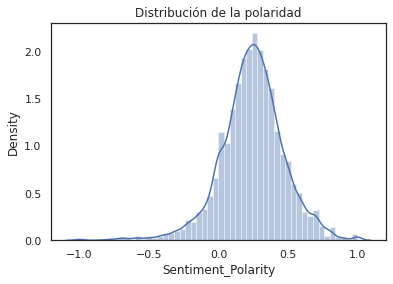

In [50]:
sns.distplot(reviews['Sentiment_Polarity'])
plt.title("Distribución de la polaridad")
plt.show()

Ahora vamos a trazar la polaridad promedio para cada calificación de puntuación.

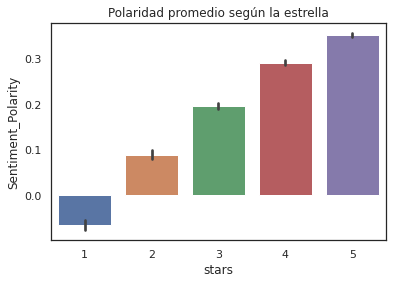

In [51]:
sns.barplot(x='stars', y='Sentiment_Polarity', data=reviews) 
plt.title("Polaridad promedio según la estrella")
plt.show()

La salida muestra claramente que las revisiones con puntajes de calificación altos tienen polaridades positivas altas.

Veamos ahora algunas de las revisiones más negativas, es decir, las revisiones con un valor de polaridad de -1.

In [52]:
most_negative = reviews[reviews['Sentiment_Polarity'] == -1].text.head()  
print(most_negative)  

533          horrible beer horrible service horrible menu
1697    terrible shelter appear routinely turn away ki...
2913    ventilation bouldering area terrible install c...
6485    boring sandwich period fall hype fill $ buck s...
9934    place terrible pittsburgh know food correct le...
Name: text, dtype: object


In [53]:
reviews['text'][533]  #La salida muestra claramente que la revisión es altamente negativa.

'horrible beer horrible service horrible menu'

Veamos ahora algunas de las críticas más positivas.

In [54]:
most_positive = reviews[reviews.Sentiment_Polarity == 1].text.head()  
print(most_positive)  

1121               absolutely delicious wonderful service
1854    look deceive think place go suck meal deliciou...
1943                       excellent trustworthy mechanic
2116    wait minute piece wood cut store friday aftern...
2441                 sunday brunch food service excellent
Name: text, dtype: object


In [55]:
reviews['text'][1121]  #La salida muestra claramente que la revisión es altamente positiva.

'absolutely delicious wonderful service'

In [56]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.2:
    return "POS"

  if sent >= 0.1 and sent <= 0.2:
    return "NEU"
  
  if sent < 0.1:
    return "NEG"

In [57]:
%%time
reviews['SENTIMENT'] = reviews["text"].apply(get_sentiment)

CPU times: user 8.82 s, sys: 31 ms, total: 8.85 s
Wall time: 8.88 s


In [58]:
reviews.head()

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity,SENTIMENT
104,want true understanding pittsburgh morning com...,b9WZJp5L1RZr4F1nxclOoQ,3,2007-03-31,2007,3,2007 3,456,NEUTRA,0.398148,POS
105,good luck get seat gab eat famous infamous din...,b9WZJp5L1RZr4F1nxclOoQ,4,2007-08-02,2007,8,2007 8,283,POSITIVA,0.300000,POS
106,stick basic good place burgh time friend sit c...,b9WZJp5L1RZr4F1nxclOoQ,5,2008-04-12,2008,4,2008 4,816,POSITIVA,0.350000,POS
107,big breakfast pittsburgh far tell delicious ch...,b9WZJp5L1RZr4F1nxclOoQ,4,2008-12-03,2008,12,2008 12,568,POSITIVA,0.433333,POS
108,cheap unpretentious favorite breakfast joint c...,b9WZJp5L1RZr4F1nxclOoQ,5,2009-03-10,2009,3,2009 3,247,POSITIVA,0.350000,POS


In [59]:
reviews.groupby(by = 'SENTIMENT').count()

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity
SENTIMENT,,,,,,,,,,
NEG,4445,4445,4445,4445,4445,4445,4445,4445,4445,4445
NEU,3519,3519,3519,3519,3519,3519,3519,3519,3519,3519
POS,11855,11855,11855,11855,11855,11855,11855,11855,11855,11855


In [60]:
some_positive_rev = reviews[reviews.SENTIMENT == 'POS'].text.head()  
print(some_positive_rev)  

104    want true understanding pittsburgh morning com...
105    good luck get seat gab eat famous infamous din...
106    stick basic good place burgh time friend sit c...
107    big breakfast pittsburgh far tell delicious ch...
108    cheap unpretentious favorite breakfast joint c...
Name: text, dtype: object


In [61]:
reviews['text'][105]

'good luck get seat gab eat famous infamous diner food like roofing mechanic meet work sure recommend work bathroom hehe'

In [62]:
some_negative_rev = reviews[reviews.SENTIMENT == 'NEG'].text.head()  
print(some_negative_rev) 

114    definitely greasy spoon pack wait worth omelet...
123    classic breakfast joint grimy look hole wall l...
228    husband fave restaurant town husband generally...
236    terrible service food unremarkable waiter disa...
249    impression door charming aroma entice enter re...
Name: text, dtype: object


In [63]:
reviews['text'][236]

'terrible service food unremarkable waiter disappear minute serve large group staffing mismanagement save tip discount meal complain crude unpleasant dining experience guest repeat'

In [64]:
some_neutro_rev = reviews[reviews.SENTIMENT == 'NEU'].text.head(10)  
print(some_neutro_rev) 

115    look frill great breakfast place get mixed gri...
118    ok cash place pittsburgh appreciate small busi...
125    yum freaking fellower yelper mention place cas...
126    good breakfast spot area like diner food place...
134    come gab n eat year let typical breakfast egg ...
141    ok chaotic alert seat wait seat try ask woman ...
148    place hear friend tuck strip mall open breakfa...
153    friend stop yesterday breakfast originally com...
231    great authentic classic italian restaurant unl...
241    write review regret love papa j recent experie...
Name: text, dtype: object


In [65]:
reviews['text'][126]

'good breakfast spot area like diner food place small want avoid church crowd sundays wait long friendly obviously work feel like lunch food little later burger breakfast griddle delicious'

####Sentimientos a través del tiempo

In [66]:
groupby_sentiments = reviews.groupby(by=['anio','SENTIMENT']).count()
groupby_sentiments

text  business_id  stars  date   mes  anio-mes  review length  \
anio SENTIMENT                                                                  
2005 NEG           1            1      1     1     1         1              1   
     NEU           2            2      2     2     2         2              2   
2006 NEG           6            6      6     6     6         6              6   
     NEU          16           16     16    16    16        16             16   
     POS          29           29     29    29    29        29             29   
2007 NEG          36           36     36    36    36        36             36   
     NEU          55           55     55    55    55        55             55   
     POS         143          143    143   143   143       143            143   
2008 NEG         120          120    120   120   120       120            120   
     NEU         153          153    153   153   153       153            153   
     POS         403          403    403   403   403       403            403   
2009 NEG         182          182    182   182   182       182            182   
     NEU         161          161    161   161   161       161            161   
     POS         502          502    502   502   502       502            502   
2010 NEG         324          324    324   324   324       324            324   
     NEU         305          305    305   305   305       305            305   
     POS         894          894    894   894   894       894            894   
2011 NEG         533          533    533   533   533       533            533   
     NEU         452          452    452   452   452       452            452   
     POS        1441         1441   1441  1441  1441      1441           1441   
2012 NEG         568          568    568   568   568       568            568   
     NEU         550          550    550   550   550       550            550   
     POS        1608         1608   1608  1608  1608      1608           1608   
2013 NEG         648          648    648   648   648       648            648   
     NEU         539          539    539   539   539       539            539   
     POS        1763         1763   1763  1763  1763      1763           1763   
2014 NEG         887          887    887   887   887       887            887   
     NEU         620          620    620   620   620       620            620   
     POS        2346         2346   2346  2346  2346      2346           2346   
2015 NEG        1140         1140   1140  1140  1140      1140           1140   
     NEU         666          666    666   666   666       666            666   
     POS        2726         2726   2726  2726  2726      2726           2726   

                type_by_stars  Sentiment_Polarity  
anio SENTIMENT                                     
2005 NEG                    1                   1  
     NEU                    2                   2  
2006 NEG                    6                   6  
     NEU                   16                  16  
     POS                   29                  29  
2007 NEG                   36                  36  
     NEU                   55                  55  
     POS                  143                 143  
2008 NEG                  120                 120  
     NEU                  153                 153  
     POS                  403                 403  
2009 NEG                  182                 182  
     NEU                  161                 161  
     POS                  502                 502  
2010 NEG                  324                 324  
     NEU                  305                 305  
     POS                  894                 894  
2011 NEG                  533                 533  
     NEU                  452                 452  
     POS                 1441                1441  
2012 NEG                  568                 568  
     NEU                  550                 550  
     POS     

In [67]:
groupby_sentiments.reset_index(inplace=True)
groupby_sentiments

,anio,SENTIMENT,text,business_id,stars,date,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity
0,2005,NEG,1,1,1,1,1,1,1,1,1
1,2005,NEU,2,2,2,2,2,2,2,2,2
2,2006,NEG,6,6,6,6,6,6,6,6,6
3,2006,NEU,16,16,16,16,16,16,16,16,16
4,2006,POS,29,29,29,29,29,29,29,29,29
5,2007,NEG,36,36,36,36,36,36,36,36,36
6,2007,NEU,55,55,55,55,55,55,55,55,55
7,2007,POS,143,143,143,143,143,143,143,143,143
8,2008,NEG,120,120,120,120,120,120,120,120,120
9,2008,NEU,153,153,153,153,153,153,153,153,153


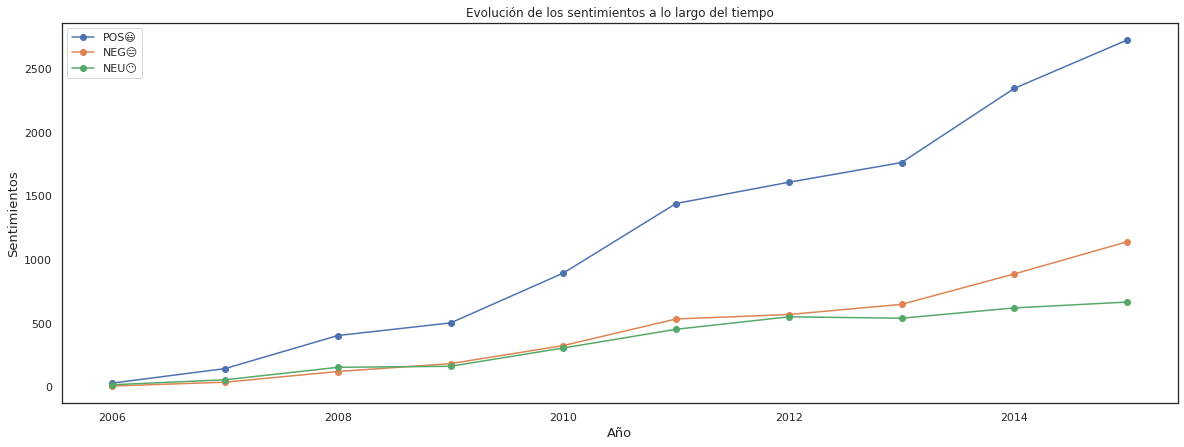

In [68]:
x=groupby_sentiments[groupby_sentiments.anio >= 2006].anio.unique()
ya=groupby_sentiments[(groupby_sentiments.anio >= 2006) & (groupby_sentiments.SENTIMENT == 'POS')].text
yb=groupby_sentiments[(groupby_sentiments.anio >= 2006) & (groupby_sentiments.SENTIMENT == 'NEG')].text
yc=groupby_sentiments[(groupby_sentiments.anio >= 2006) & (groupby_sentiments.SENTIMENT == 'NEU')].text


plt.plot(x,ya,marker="o",label = "POS😃")
plt.plot(x,yb,marker="o",label = "NEG😑")
plt.plot(x,yc,marker="o",label = "NEU😶")


plt.legend(loc = "upper left")
plt.title("Evolución de los sentimientos a lo largo del tiempo")
plt.gcf().set_size_inches(20, 7)
plt.xlabel("Año",fontsize=13)
plt.ylabel("Sentimientos",fontsize=13)

plt.show()

###WordCloud

In [69]:
%matplotlib inline
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

####Total Reviews

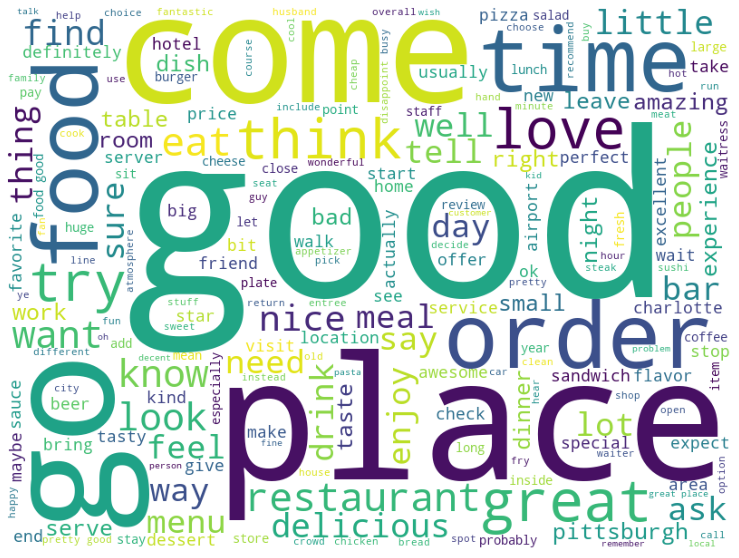

In [70]:
cloud(' '.join(reviews['text'])) #wordcloud de todas las reviews

Bad Reviews

In [71]:
#cloud(' '.join(reviews[(reviews.SENTIMENT == 'NEG' )]['text'])) #wordcloud de todas las badreviews, NO SE VE LA DIFERENCIA CON GOOD REVIEWS

Good Reviews

In [72]:
#cloud(' '.join(reviews[(reviews.stars >=3 )]['text'])) #wordcloud de todas las goodreviews, NO SE VE LA DIFERENCIA CON BAD REVIEWS

####Reviews Negativas más frecuentes

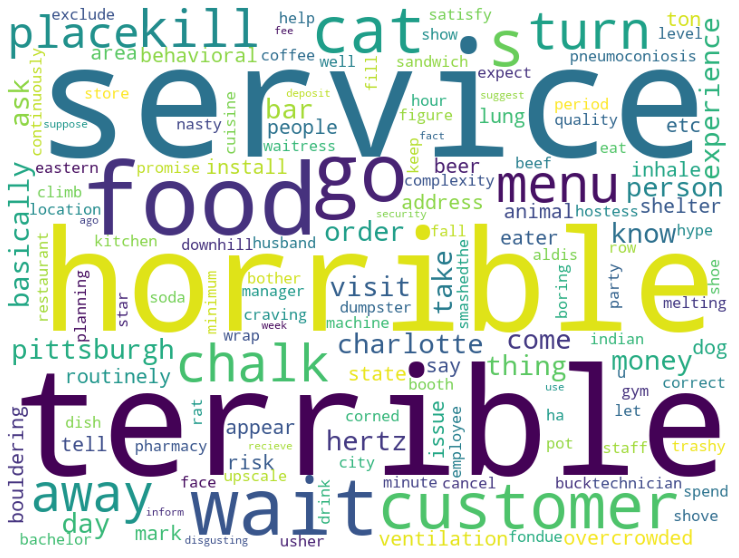

In [73]:
cloud(' '.join(reviews[reviews['Sentiment_Polarity'] == -1].text.head(50)))

####Reviews Positivas más frecuentes

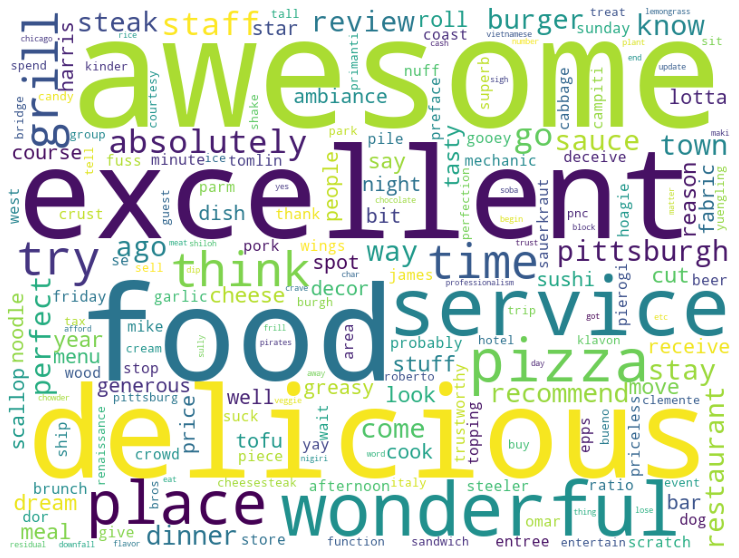

In [74]:
cloud(' '.join(reviews[reviews['Sentiment_Polarity'] == 1].text.head(50)))

###Entidades por review

In [75]:
def get_entities(text):
  doc=nlp(text)
  ents = [ent.text for ent in doc.ents]
  return ents

In [76]:
%%time
reviews["NER"] = reviews["text"].apply(get_entities)
reviews.head(5)

CPU times: user 4min 36s, sys: 1.1 s, total: 4min 37s
Wall time: 4min 42s


,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity,SENTIMENT,NER
104,want true understanding pittsburgh morning com...,b9WZJp5L1RZr4F1nxclOoQ,3,2007-03-31,2007,3,2007 3,456,NEUTRA,0.398148,POS,"[morning, midwest]"
105,good luck get seat gab eat famous infamous din...,b9WZJp5L1RZr4F1nxclOoQ,4,2007-08-02,2007,8,2007 8,283,POSITIVA,0.300000,POS,[]
106,stick basic good place burgh time friend sit c...,b9WZJp5L1RZr4F1nxclOoQ,5,2008-04-12,2008,4,2008 4,816,POSITIVA,0.350000,POS,[italian]
107,big breakfast pittsburgh far tell delicious ch...,b9WZJp5L1RZr4F1nxclOoQ,4,2008-12-03,2008,12,2008 12,568,POSITIVA,0.433333,POS,"[big breakfast pittsburgh far tell, quarter, m..."
108,cheap unpretentious favorite breakfast joint c...,b9WZJp5L1RZr4F1nxclOoQ,5,2009-03-10,2009,3,2009 3,247,POSITIVA,0.350000,POS,[]


In [77]:
lista_entidades = []
lista_entidades_pos = []
lista_entidades_neg = []
lista_entidades_neu = []


for tipo, entidades in zip(reviews.type_by_stars, reviews.NER):
    lista_entidades += entidades
    if tipo == 'POSITIVA':
        lista_entidades_pos += entidades
    if tipo == 'NEGATIVA':
        lista_entidades_neg += entidades
    if tipo == 'NEUTRA':
        lista_entidades_neu += entidades



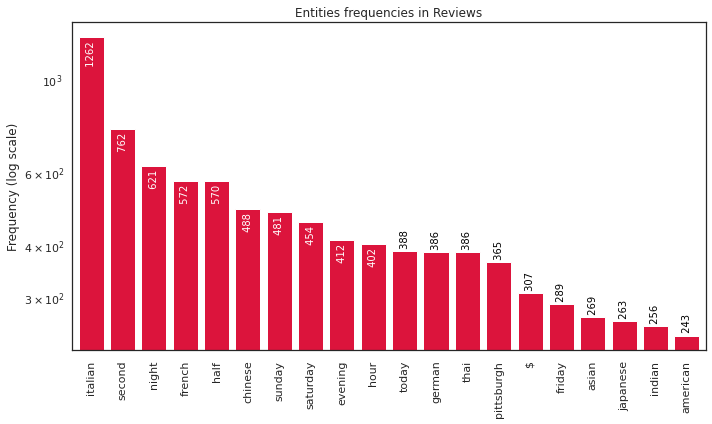

In [78]:
tf = collections.Counter(lista_entidades)
tf_1 = collections.Counter(lista_entidades_pos)
tf_2 = collections.Counter(lista_entidades_neg)
tf_3 = collections.Counter(lista_entidades_neu)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]



###
fig = plt.figure(figsize=(10,6))
plt.bar(x, y, color='crimson')
plt.title("Entities frequencies in Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

#####


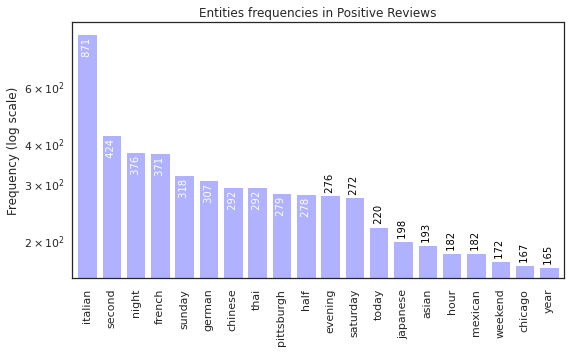

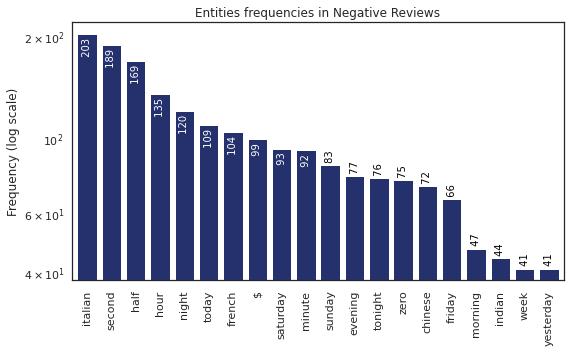

In [79]:
y_1 = [count for tag, count in tf_1.most_common(20)]
x_1 = [tag for tag, count in tf_1.most_common(20)]

y_2 = [count for tag, count in tf_2.most_common(20)]
x_2 = [tag for tag, count in tf_2.most_common(20)]

y_3 = [count for tag, count in tf_3.most_common(20)]
x_3 = [tag for tag, count in tf_3.most_common(20)]

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x_1, y_1, color='#B1B2FF')
plt.title("Entities frequencies in Positive Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf_1.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
#plt.show()

#######
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.bar(x_2, y_2, color='#25316D')
plt.title("Entities frequencies in Negative Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf_2.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
#plt.show()


######
"""fig = plt.figure(figsize=(10,5))
plt.subplot(2, 2, 3)
plt.bar(x_3, y_3, color='#A7D2CB')
plt.title("Entities frequencies in Nuetra Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf_3.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely"""


plt.show()

###Negocios con más comentarios y su clasificación

####Good Reviews

In [80]:
reviews_groupby_pos = reviews.loc[(reviews['type_by_stars'] == 'POSITIVA')]
reviews_groupby_pos = reviews_groupby_pos.groupby(by='business_id').count().sort_values(by="text", ascending=False)

####Bad Reviews

In [81]:
reviews_groupby_neg = reviews.loc[(reviews['type_by_stars'] == 'NEGATIVA')]
reviews_groupby_neg= reviews_groupby_neg.groupby(by='business_id').count().sort_values(by="text", ascending=False)

####Gráfica de los negocios según el tipo de review

In [82]:
result = pd.merge(reviews_groupby_pos, reviews_groupby_neg, on='business_id', how="outer")
result = result[['text_x', 'text_y']]
#result.set_index('business_id')
result.rename(columns={'text_x':'reviews_pos', 'text_y':'reviews_neg'}, inplace=True)
result.fillna(0, inplace=True)
result.head(10)

,reviews_pos,reviews_neg
business_id,,
3Q0QQPnHcJuX1DLCL9G9Cg,601,169.0
mpDxBBGywUE6GRRKja3sBA,358,90.0
jTGQUWGIVvL-aY03C5BEmw,223,37.0
2X5G4Ujq0s4Wfn4TC7gX0g,210,10.0
NeUf9FyCCIN4MEseNyqkXQ,209,102.0
NTfUFk8GyOLL1uPbEO-pVg,188,31.0
2SwC8wqpZC4B9iFVTgYT9A,186,22.0
CChwRoYVXA3QZulS8a6xOQ,180,12.0
2Igiyhi82R8_QaaPplRmCw,179,12.0


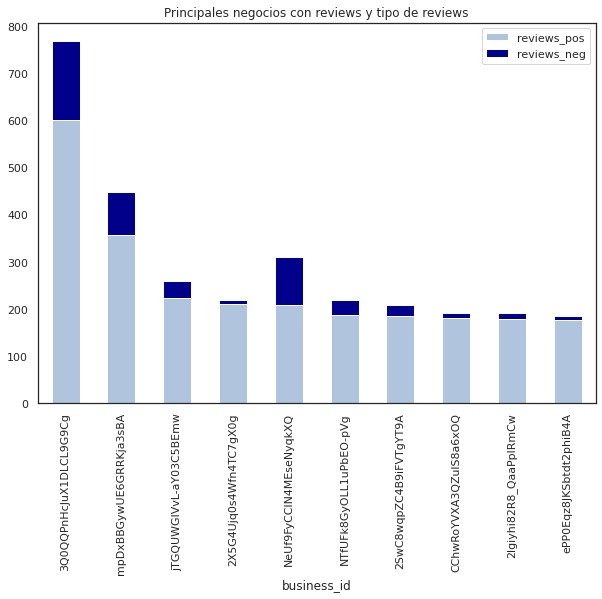

In [83]:
primeros = result.head(n=10)
primeros.plot(kind = 'bar', stacked = True, figsize=(10,7), width=0.5, bottom=0, align='center', color=['lightsteelblue', 'darkblue'])
plt.title("Principales negocios con reviews y tipo de reviews")
plt.show()

###KeyBert

####Keyword Extraction

In [84]:
kw_model = KeyBERT()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [85]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19819 entries, 104 to 27223
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   text                19819 non-null  object        
 1   business_id         19819 non-null  object        
 2   stars               19819 non-null  int64         
 3   date                19819 non-null  datetime64[ns]
 4   anio                19819 non-null  int64         
 5   mes                 19819 non-null  int64         
 6   anio-mes            19819 non-null  object        
 7   review length       19819 non-null  int64         
 8   type_by_stars       19819 non-null  object        
 9   Sentiment_Polarity  19819 non-null  float64       
 10  SENTIMENT           19819 non-null  object        
 11  NER                 19819 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 2.5+ MB


In [86]:
reviews_filtrado = reviews[(reviews['SENTIMENT']!='NEU')]
reviews_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 104 to 27223
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   text                16300 non-null  object        
 1   business_id         16300 non-null  object        
 2   stars               16300 non-null  int64         
 3   date                16300 non-null  datetime64[ns]
 4   anio                16300 non-null  int64         
 5   mes                 16300 non-null  int64         
 6   anio-mes            16300 non-null  object        
 7   review length       16300 non-null  int64         
 8   type_by_stars       16300 non-null  object        
 9   Sentiment_Polarity  16300 non-null  float64       
 10  SENTIMENT           16300 non-null  object        
 11  NER                 16300 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.6+ MB


In [87]:
reviews_filtrado.text

104      want true understanding pittsburgh morning com...
105      good luck get seat gab eat famous infamous din...
106      stick basic good place burgh time friend sit c...
107      big breakfast pittsburgh far tell delicious ch...
108      cheap unpretentious favorite breakfast joint c...
                               ...                        
27219    know place get rib expert smoky color big prob...
27220    excellent stop way savannah bubba interstate t...
27221                  waste time poor service screw order
27222    come lunch togo love bbq sandwich fry bbq cook...
27223    server friendly timely food severely overprice...
Name: text, Length: 16300, dtype: object

In [88]:
porcentaje_muestra = 0.1 #elijimos el porcentaje de muestra a tomar

In [89]:
muestra_size=int(round(reviews_filtrado.shape[0]*porcentaje_muestra,0)) #calcula el tamaño de la muestra según el % seleccionado

In [90]:
muestra = reviews_filtrado.sample(muestra_size)
muestra

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity,SENTIMENT,NER
3720,great little italian inspire restaurant right ...,q_BKmbdlYfQJroJVHfYMUQ,4,2015-01-11,2015,1,2015 1,418,POSITIVA,0.286272,POS,"[italian, italian, daily]"
17295,restaurant barely meh time town convention lot...,vIXUw1cLG84-m8LzOg3f-w,3,2015-02-24,2015,2,2015 2,1728,NEUTRA,0.064060,NEG,[burger chicken fajita]
16227,crowed booth gross inside sushi scary looking ...,5p3Tqyp19UowO0-dAFvxMw,2,2015-10-06,2015,10,2015 10,119,NEGATIVA,-0.250000,NEG,[]
9551,eat yesterday time definitely fan vibe sit roo...,XzaJf6WzpU7RsXTXzx72Xg,5,2011-08-05,2011,8,2011 8,1386,POSITIVA,0.052614,NEG,"[80th, 5th]"
25649,palm get reputation build know market appear a...,1gKBusJMk66ypwEKF0vOAA,1,2015-06-20,2015,6,2015 6,396,NEGATIVA,0.266071,POS,"[ruth chris, joey major]"
...,...,...,...,...,...,...,...,...,...,...,...,...
19991,enjoy dinner drink time day start go bobcats g...,TLrX4FECQDFz-E45TI_9ow,5,2009-04-09,2009,4,2009 4,506,POSITIVA,-0.052083,NEG,"[couple night, 1.95]"
25722,marvelous experience let echo previous note se...,s-cFWOk9LXXZCrm4lKpjEg,4,2013-10-27,2013,10,2013 10,704,POSITIVA,0.272894,POS,"[tonight, chinese, chinese, south park]"
17641,awesome office good optometrist highly recommend,3agV-iW8yukcXpbHom3p3Q,5,2015-09-03,2015,9,2015 9,64,POSITIVA,0.620000,POS,[]
15303,update 12/17/12 good staff friendly helpful de...,mAdtkJLHIVjbDnZlc5aQYg,4,2011-11-08,2011,11,2011 11,1061,POSITIVA,0.305625,POS,[one]


In [91]:
%%time 
#con score
muestra["KEYWORDS"] = muestra.text.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: user 4min 43s, sys: 1min 50s, total: 6min 34s
Wall time: 4min 34s


In [92]:
%%time
#sin score
muestra["KEYWORDS"] = muestra.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

CPU times: user 4.93 ms, sys: 5.89 ms, total: 10.8 ms
Wall time: 5.44 ms


In [93]:
muestra

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity,SENTIMENT,NER,KEYWORDS
3720,great little italian inspire restaurant right ...,q_BKmbdlYfQJroJVHfYMUQ,4,2015-01-11,2015,1,2015 1,418,POSITIVA,0.286272,POS,"[italian, italian, daily]","[restaurant, pasta, italian]"
17295,restaurant barely meh time town convention lot...,vIXUw1cLG84-m8LzOg3f-w,3,2015-02-24,2015,2,2015 2,1728,NEUTRA,0.064060,NEG,[burger chicken fajita],"[restaurant, steakhouse, waitress]"
16227,crowed booth gross inside sushi scary looking ...,5p3Tqyp19UowO0-dAFvxMw,2,2015-10-06,2015,10,2015 10,119,NEGATIVA,-0.250000,NEG,[],"[sushi, booth, crowed]"
9551,eat yesterday time definitely fan vibe sit roo...,XzaJf6WzpU7RsXTXzx72Xg,5,2011-08-05,2011,8,2011 8,1386,POSITIVA,0.052614,NEG,"[80th, 5th]","[waitress, decor, patio]"
25649,palm get reputation build know market appear a...,1gKBusJMk66ypwEKF0vOAA,1,2015-06-20,2015,6,2015 6,396,NEGATIVA,0.266071,POS,"[ruth chris, joey major]","[market, overprice, steakhouse]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,enjoy dinner drink time day start go bobcats g...,TLrX4FECQDFz-E45TI_9ow,5,2009-04-09,2009,4,2009 4,506,POSITIVA,-0.052083,NEG,"[couple night, 1.95]","[bobcats, dinner, waitress]"
25722,marvelous experience let echo previous note se...,s-cFWOk9LXXZCrm4lKpjEg,4,2013-10-27,2013,10,2013 10,704,POSITIVA,0.272894,POS,"[tonight, chinese, chinese, south park]","[restaurant, spicy, chicken]"
17641,awesome office good optometrist highly recommend,3agV-iW8yukcXpbHom3p3Q,5,2015-09-03,2015,9,2015 9,64,POSITIVA,0.620000,POS,[],"[optometrist, office, recommend]"
15303,update 12/17/12 good staff friendly helpful de...,mAdtkJLHIVjbDnZlc5aQYg,4,2011-11-08,2011,11,2011 11,1061,POSITIVA,0.305625,POS,[one],"[hotel, restaurant, room]"


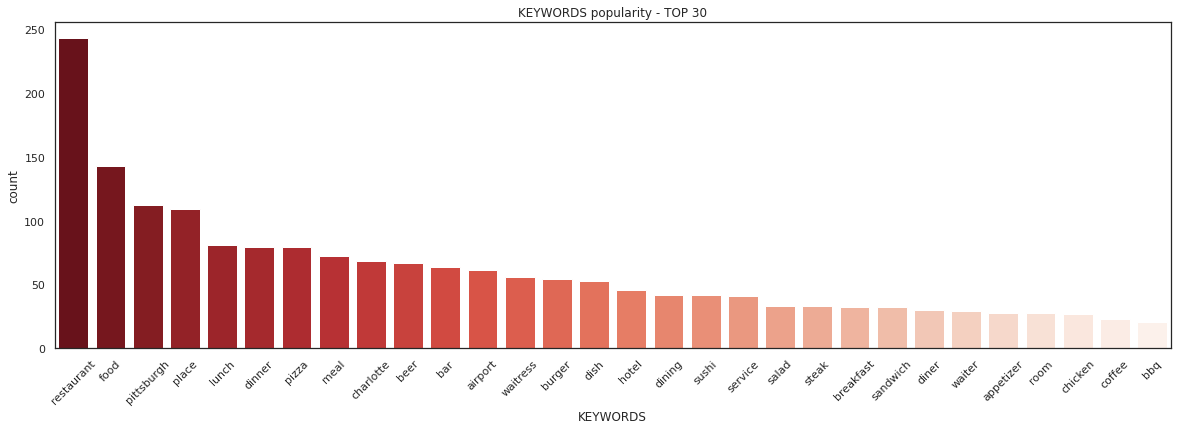

In [94]:
plt.figure(figsize=(20,6))
sns.countplot(x=muestra.explode("KEYWORDS").KEYWORDS, 
              order=muestra.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

####Keywords por sentimento

In [95]:
left = muestra.explode("KEYWORDS").KEYWORDS

In [96]:
right = muestra.explode("SENTIMENT").SENTIMENT

In [97]:
key_sent = pd.merge(
    left,
    right,
    how="inner",
    left_index=True, right_index=True,
    on=None)
key_sent

,KEYWORDS,SENTIMENT
105,diner,POS
105,work,POS
105,mechanic,POS
109,diner,POS
109,breakfast,POS
...,...,...
27182,restaurant,POS
27182,cue,POS
27214,bbq,POS
27214,lunch,POS


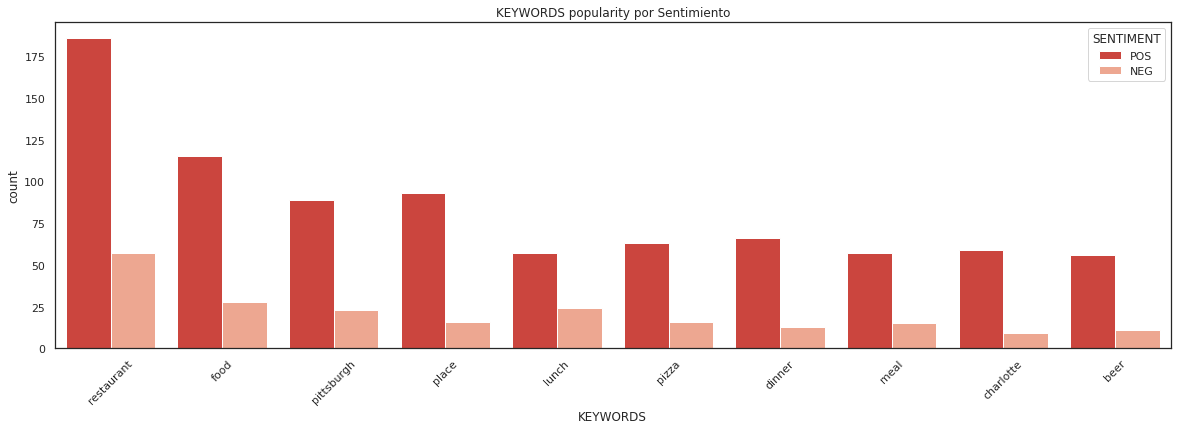

In [98]:
plt.figure(figsize=(20,6))
sns.countplot(x=key_sent.KEYWORDS, 
              order=key_sent.KEYWORDS.value_counts().index[:10],
              palette='Reds_r',
              hue = key_sent.SENTIMENT)
plt.title("KEYWORDS popularity por Sentimiento")
columna.bar_label(columna.containers[0])
plt.xticks(rotation=45)
plt.show()

In [99]:
key_sent[key_sent['SENTIMENT'] == 'NEG'] 

,KEYWORDS,SENTIMENT
123,grease,NEG
123,grill,NEG
123,food,NEG
285,restaurant,NEG
285,waitress,NEG
...,...,...
26944,burrito,NEG
26944,enchilada,NEG
26985,restaurant,NEG
26985,food,NEG


In [100]:
muestra.explode("KEYWORDS").KEYWORDS, 

(3720     restaurant
 3720          pasta
 3720        italian
 17295    restaurant
 17295    steakhouse
             ...    
 15303    restaurant
 15303          room
 20148           zoo
 20148    exhibition
 20148    downstairs
 Name: KEYWORDS, Length: 4884, dtype: object,)

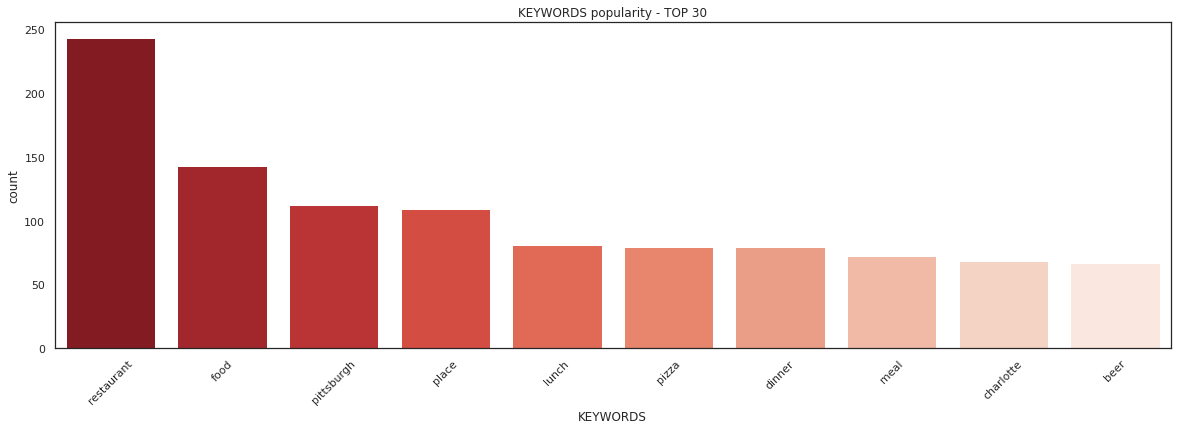

In [101]:
plt.figure(figsize=(20,6))
sns.countplot(x=key_sent['KEYWORDS'], 
              order=key_sent['KEYWORDS'].value_counts().index[:10],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

####Tópicos por negocio

In [102]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(muestra["text"].values)

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2022-09-18 22:24:51,947 - BERTopic - Transformed documents to Embeddings
2022-09-18 22:25:07,725 - BERTopic - Reduced dimensionality
2022-09-18 22:25:07,969 - BERTopic - Clustered reduced embeddings


CPU times: user 1min 18s, sys: 1.56 s, total: 1min 20s
Wall time: 1min 15s


In [103]:
topics_data = topic_model.get_topic_info()
topics_data.head(10)

,Topic,Count,Name
0,-1,692,-1_good_food_order_place
1,0,138,0_beer_bar_place_drink
2,1,75,1_pittsburgh_sandwich_good_place
3,2,71,2_airport_flight_clean_security
4,3,51,3_charlotte_favorite_place_restaurant
5,4,47,4_pizza_crust_cheese_sauce
6,5,46,5_ask_waitress_rude_food
7,6,43,6_room_hotel_stay_bed
8,7,40,7_italian_pasta_good_tiramisu
9,8,38,8_great_amazing_food_excellent


In [104]:
muestra["TOPIC_ID"] = topics
muestra = muestra.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
muestra = muestra.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
muestra = muestra.drop(["Topic"], axis=1)
muestra.head(3)

,text,business_id,stars,date,anio,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity,SENTIMENT,NER,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME
0,great little italian inspire restaurant right ...,q_BKmbdlYfQJroJVHfYMUQ,4,2015-01-11,2015,1,2015 1,418,POSITIVA,0.286272,POS,"[italian, italian, daily]","[restaurant, pasta, italian]",7,40,7_italian_pasta_good_tiramisu
1,restaurant barely meh time town convention lot...,vIXUw1cLG84-m8LzOg3f-w,3,2015-02-24,2015,2,2015 2,1728,NEUTRA,0.064060,NEG,[burger chicken fajita],"[restaurant, steakhouse, waitress]",11,25,11_waitress_tell_come_take
2,crowed booth gross inside sushi scary looking ...,5p3Tqyp19UowO0-dAFvxMw,2,2015-10-06,2015,10,2015 10,119,NEGATIVA,-0.250000,NEG,[],"[sushi, booth, crowed]",9,28,9_sushi_japanese_korean_musashi


In [105]:
topic_model.visualize_topics()

In [106]:
topic_model.visualize_hierarchy()

In [107]:
topic_model.visualize_barchart()

In [108]:
topic_model.visualize_heatmap()

In [109]:
groupby_9cg = reviews[reviews['business_id']=="3Q0QQPnHcJuX1DLCL9G9Cg"].groupby(by=['anio','SENTIMENT']).count()
groupby_9cg 

text  business_id  stars  date  mes  anio-mes  review length  \
anio SENTIMENT                                                                 
2006 NEU           1            1      1     1    1         1              1   
     POS           1            1      1     1    1         1              1   
2007 NEG           1            1      1     1    1         1              1   
     NEU           2            2      2     2    2         2              2   
     POS           2            2      2     2    2         2              2   
2008 NEG           7            7      7     7    7         7              7   
     NEU          10           10     10    10   10        10             10   
     POS          16           16     16    16   16        16             16   
2009 NEG           3            3      3     3    3         3              3   
     NEU           4            4      4     4    4         4              4   
     POS          16           16     16    16   16        16             16   
2010 NEG           8            8      8     8    8         8              8   
     NEU          22           22     22    22   22        22             22   
     POS          30           30     30    30   30        30             30   
2011 NEG          44           44     44    44   44        44             44   
     NEU          33           33     33    33   33        33             33   
     POS          71           71     71    71   71        71             71   
2012 NEG          40           40     40    40   40        40             40   
     NEU          35           35     35    35   35        35             35   
     POS          81           81     81    81   81        81             81   
2013 NEG          53           53     53    53   53        53             53   
     NEU          36           36     36    36   36        36             36   
     POS          88           88     88    88   88        88             88   
2014 NEG          89           89     89    89   89        89             89   
     NEU          53           53     53    53   53        53             53   
     POS         109          109    109   109  109       109            109   
2015 NEG          77           77     77    77   77        77             77   
     NEU          34           34     34    34   34        34             34   
     POS         102          102    102   102  102       102            102   

                type_by_stars  Sentiment_Polarity  NER  
anio SENTIMENT                                          
2006 NEU                    1                   1    1  
     POS                    1                   1    1  
2007 NEG                    1                   1    1  
     NEU                    2                   2    2  
     POS                    2                   2    2  
2008 NEG                    7                   7    7  
     NEU                   10                  10   10  
     POS                   16                  16   16  
2009 NEG                    3                   3    3  
     NEU                    4                   4    4  
     POS                   16                  16   16  
2010 NEG                    8                   8    8  
     NEU                   22                  22   22  
     POS                   30                  30   30  
2011 NEG                   44                  44   44  
     NEU                   33                  33   33  
     POS                   71                  71   71  
2012 NEG                   40                  40   40  
     NEU                   35                  35   35  
     POS                   81                  81   81  
2013 NEG                   53                  53   53  
     NEU                   36                  36   36  
     POS                   88                  88   88  
2014 NEG                   89                  89   89  
     NEU                   53                  53   5

In [110]:
groupby_9cg.reset_index(inplace=True)
groupby_9cg 

,anio,SENTIMENT,text,business_id,stars,date,mes,anio-mes,review length,type_by_stars,Sentiment_Polarity,NER
0,2006,NEU,1,1,1,1,1,1,1,1,1,1
1,2006,POS,1,1,1,1,1,1,1,1,1,1
2,2007,NEG,1,1,1,1,1,1,1,1,1,1
3,2007,NEU,2,2,2,2,2,2,2,2,2,2
4,2007,POS,2,2,2,2,2,2,2,2,2,2
5,2008,NEG,7,7,7,7,7,7,7,7,7,7
6,2008,NEU,10,10,10,10,10,10,10,10,10,10
7,2008,POS,16,16,16,16,16,16,16,16,16,16
8,2009,NEG,3,3,3,3,3,3,3,3,3,3
9,2009,NEU,4,4,4,4,4,4,4,4,4,4


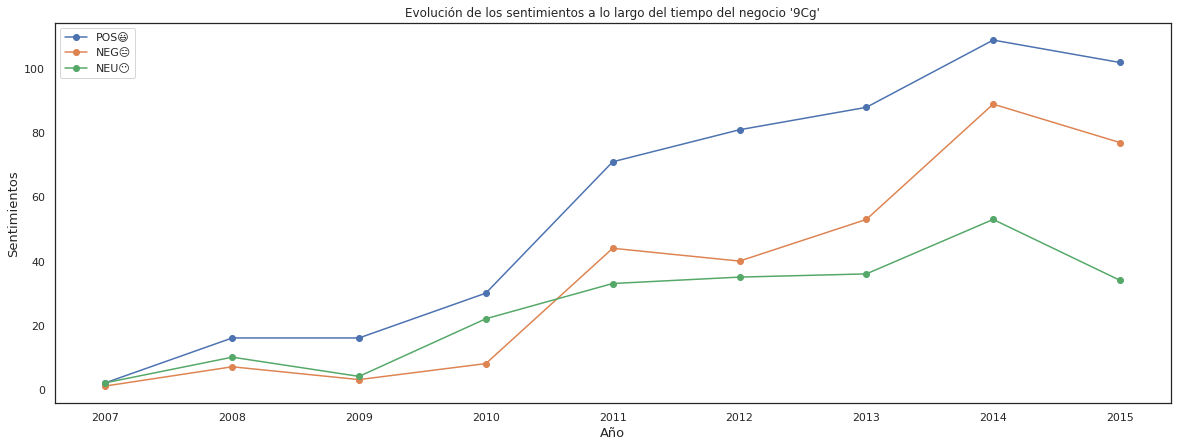

In [111]:
x=groupby_9cg[groupby_9cg.anio >= 2007].anio.unique()
ya=groupby_9cg[(groupby_9cg.anio >= 2007) & (groupby_9cg.SENTIMENT == 'POS')].text
yb=groupby_9cg[(groupby_9cg.anio >= 2007) & (groupby_9cg.SENTIMENT == 'NEG')].text
yc=groupby_9cg[(groupby_9cg.anio >= 2007) & (groupby_9cg.SENTIMENT == 'NEU')].text


plt.plot(x,ya,marker="o",label = "POS😃")
plt.plot(x,yb,marker="o",label = "NEG😑")
plt.plot(x,yc,marker="o",label = "NEU😶")


plt.legend(loc = "upper left")
plt.title("Evolución de los sentimientos a lo largo del tiempo del negocio '9Cg'")
plt.gcf().set_size_inches(20, 7)
plt.xlabel("Año",fontsize=13)
plt.ylabel("Sentimientos",fontsize=13)

plt.show()